In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
path= ('Churn_Modelling.csv')
df = pd.read_csv(path)
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
df.drop('RowNumber',axis='columns',inplace=True)

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

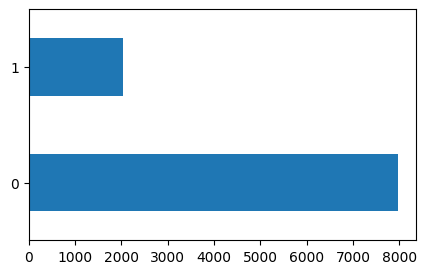

In [ ]:
df['Exited'].value_counts().plot(kind='barh', figsize=(5, 3))

In [ ]:
df.shape

(10000, 13)

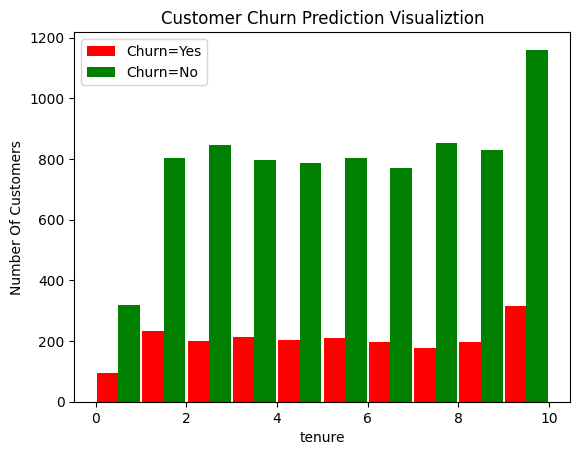

In [ ]:
#Data Visualization
exited_no = df[df.Exited==0].Tenure
exited_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([exited_yes, exited_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


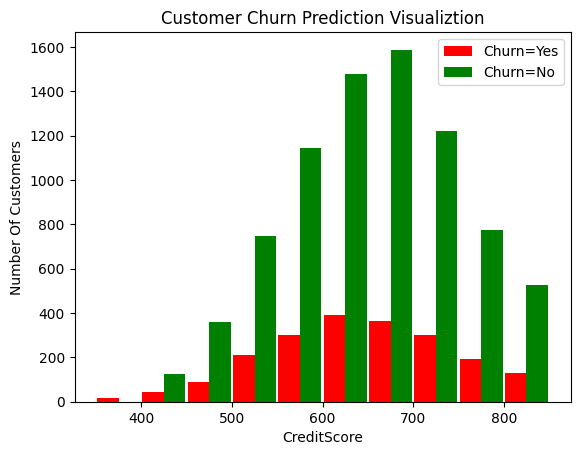

In [ ]:
#Data Visualization
exited_no = df[df.Exited==0].CreditScore
exited_yes = df[df.Exited==1].CreditScore

plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([exited_yes, exited_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#One Hot Encoding
df = pd.get_dummies(data=df,columns=['Geography'])
df

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,15647311,Hill,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,15619304,Onio,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,15701354,Boni,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,15737888,Mitchell,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,15569892,Johnstone,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,15584532,Liu,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,15682355,Sabbatini,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_columns=['CreditScore','Age','Balance','EstimatedSalary','Tenure','NumOfProducts']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,15634602,Hargrave,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,15647311,Hill,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,15619304,Onio,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,15701354,Boni,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,15737888,Mitchell,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,15569892,Johnstone,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,15584532,Liu,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,15682355,Sabbatini,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  float64
 3   Gender             10000 non-null  int64  
 4   Age                10000 non-null  float64
 5   Tenure             10000 non-null  float64
 6   Balance            10000 non-null  float64
 7   NumOfProducts      10000 non-null  float64
 8   HasCrCard          10000 non-null  int64  
 9   IsActiveMember     10000 non-null  int64  
 10  EstimatedSalary    10000 non-null  float64
 11  Exited             10000 non-null  int64  
 12  Geography_France   10000 non-null  uint8  
 13  Geography_Germany  10000 non-null  uint8  
 14  Geography_Spain    10000 non-null  uint8  
dtypes: float64(6), int64(5), object(1), uint8(3)
memory usage: 966.9+ KB


In [ ]:
df.drop(['Surname','CustomerId'],axis='columns',inplace=True)

In [ ]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [ ]:
len(X_train.columns)

12

## Build a model (ANN) in tensorflow/keras
Lets evaluate different machine learning models using cross-validation.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='tanh'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer = 'adam',
             loss ='binary_crossentropy',
            metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5893 - accuracy: 0.7040
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4910 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4724 - accuracy: 0.7958
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4611 - accuracy: 0.8021
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4530 - accuracy: 0.8077
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4460 - accuracy: 0.8095
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4401 - accuracy: 0.8135
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8161
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8169
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4280 - accura

In [ ]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8545


[0.3560900390148163, 0.8544999957084656]

In [ ]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.03983849],
       [0.09453925],
       [0.0844154 ],
       ...,
       [0.00675829],
       [0.0104029 ],
       [0.06070664]], dtype=float32)

In [ ]:
y_pred =[]
for ele in yp:
    if ele>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1537,   58],
       [ 233,  172]])

<Axes: >

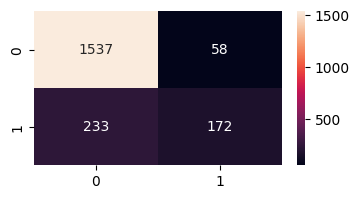

In [ ]:
import seaborn as sns
plt.figure(figsize=(4,2))
plt.xlabel('pred')
plt.ylabel('truth')
sns.heatmap(cm,annot=True,fmt='d')